In [1]:
# Copy the images from the Knee_OA dataset to the Knee_OA/Original folder
import os
import shutil
from tqdm import tqdm

def move_knee_OA_images(source_folder, destination_folder):
    # Dictionary for folder mappings
    prefixes = {
        "0": "healthy_",
        "1": "doubtful_",
        "2": "minimal_",
        "3": "moderate_",
        "4": "severe_"
    }

    # Ensure the destination folder exists
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through the subfolders
    for subfolder in os.listdir(source_folder):
        if subfolder in prefixes:
            # Path to the current subfolder
            subfolder_path = os.path.join(source_folder, subfolder)

            # Check if it is a directory
            if os.path.isdir(subfolder_path):
                # Iterate through the PNG images in the subfolder
                for filename in tqdm(os.listdir(subfolder_path)):
                    if filename.endswith('.png'):
                        # Source path of the PNG image
                        source_path = os.path.join(subfolder_path, filename)
                        # Destination path with new name
                        dest_path = os.path.join(destination_folder, prefixes[subfolder] + filename)

                        # Copy the PNG image to the destination folder with a new name
                        shutil.copy2(source_path, dest_path)

    print("Files copied successfully!")

source_folder = "/mnt/g/Datasets/Knee_OA/archive/train/"
destination_folder = "/mnt/g/Datasets/Knee_OA/Original/train/images"
move_knee_OA_images(source_folder, destination_folder)

source_folder = "/mnt/g/Datasets/Knee_OA/archive/val/"
destination_folder = "/mnt/g/Datasets/Knee_OA/Original/val/images"
move_knee_OA_images(source_folder, destination_folder)

source_folder = "/mnt/g/Datasets/Knee_OA/archive/test/"
destination_folder = "/mnt/g/Datasets/Knee_OA/Original/test/images"
move_knee_OA_images(source_folder, destination_folder)

100%|██████████| 173/173 [00:06<00:00, 26.28it/s]


Files copied successfully!


100%|██████████| 27/27 [00:01<00:00, 25.35it/s]


Files copied successfully!


100%|██████████| 51/51 [00:01<00:00, 26.99it/s]

Files copied successfully!


In [2]:
# Create a csv file for the Knee_OA dataset
import os
import csv


def create_knee_OA_csv(folder_path, csv_path):
    # Mapping for filenames to captions
    caption_map = {
        "healthy": "healthy normal",
        "doubtful": "doubtful osteoarthritis",
        "minimal": "minimal osteoarthritis",
        "moderate": "moderate osteoarthritis",
        "severe": "severe osteoarthritis"
    }

    # Open the CSV file in write mode
    with open(csv_path, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile, delimiter='\t')
        # Write the header
        csv_writer.writerow(['filepath', 'caption'])
        
        # Iterate through the files in the folder
        for filename in os.listdir(folder_path):
            full_path = os.path.join(folder_path, filename)
            # Determine the caption based on the filename
            caption = None
            for keyword, keyword_caption in caption_map.items():
                if keyword in filename:
                    caption = keyword_caption
                    break
            # If a caption was found, write the filepath and caption to the CSV
            if caption:
                csv_writer.writerow([full_path, caption])

    print("CSV file created successfully!")

# Folder and CSV paths
folder_path = "/mnt/g/Datasets/Knee_OA/Original/train/images"
csv_path = "/home/yilu/Development/open_clip/Knee_OA/train.csv"
create_knee_OA_csv(folder_path, csv_path)

folder_path = "/mnt/g/Datasets/Knee_OA/Original/val/images"
csv_path = "/home/yilu/Development/open_clip/Knee_OA/val.csv"
create_knee_OA_csv(folder_path, csv_path)

folder_path = "/mnt/g/Datasets/Knee_OA/Original/test/images"
csv_path = "/home/yilu/Development/open_clip/Knee_OA/test.csv"
create_knee_OA_csv(folder_path, csv_path)

CSV file created successfully!
CSV file created successfully!
CSV file created successfully!


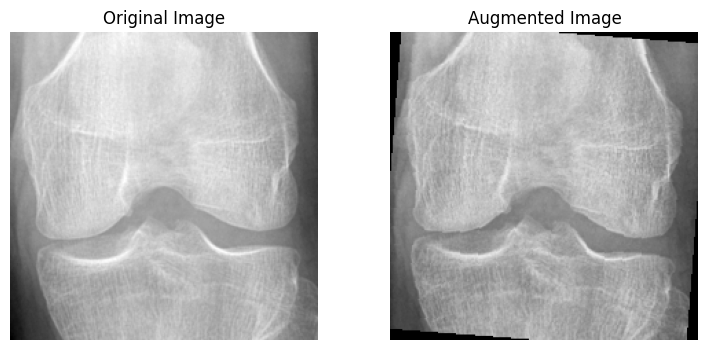

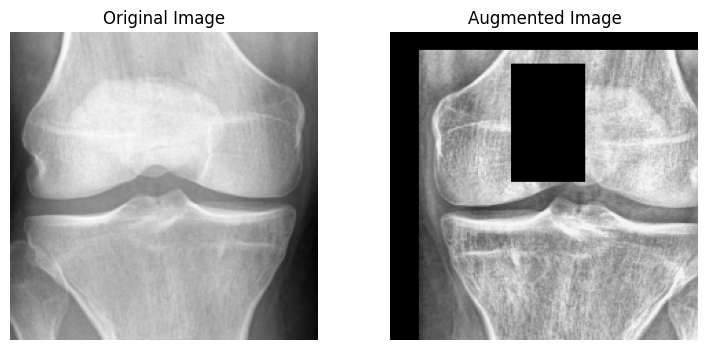

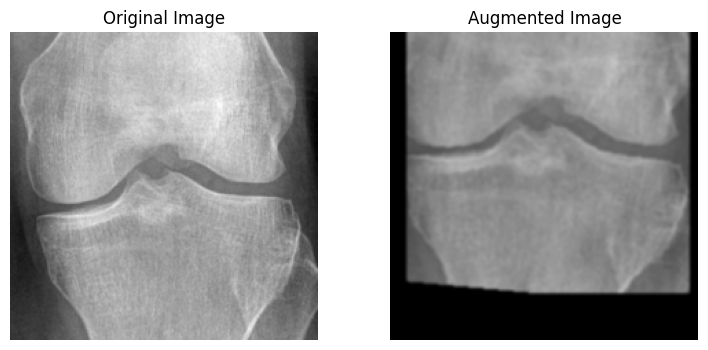

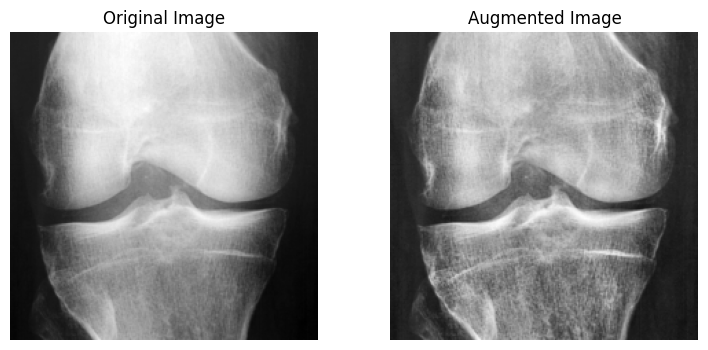

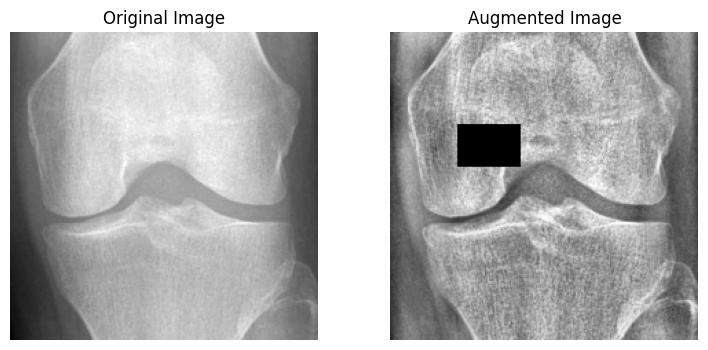

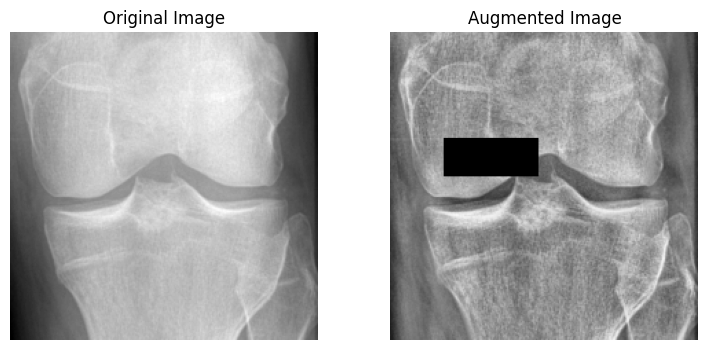

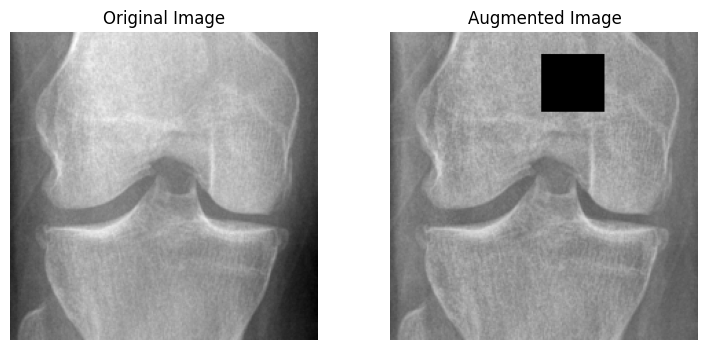

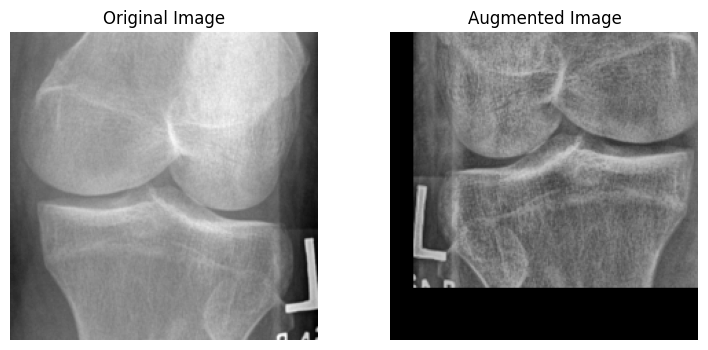

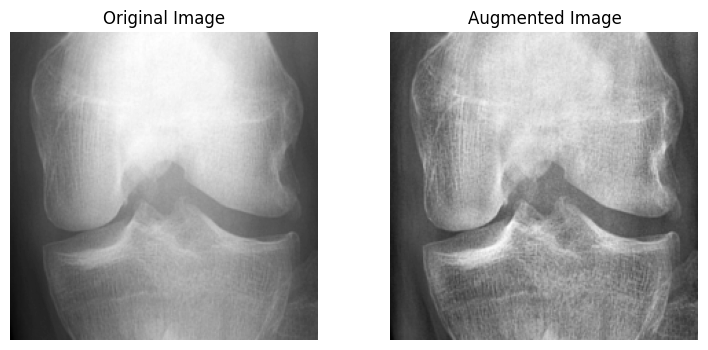

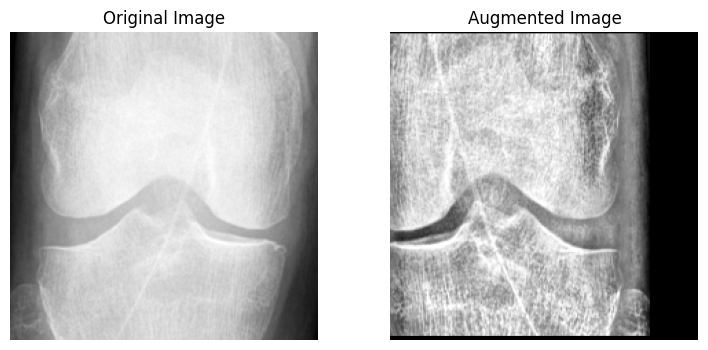

In [2]:
"""
To visualize the augmentation on a few images, you can follow the steps below:

Load a few images.
Apply the transformation pipeline train_transform to each image.
Display the original and augmented images side by side using matplotlib.

Remember to change path_to_your_images to the directory where your images are located. 
The code will display the original and augmented images side by side for the first five images in the directory. 
This will allow you to inspect the effects of your augmentation pipeline.
"""
import os, random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from torchvision.transforms import ToPILImage
import sys
sys.path.append('/home/yilu/Development/open_clip/Knee_OA/')
from image_augmentation import customized_augmentation

image_size = (224,224)
train_transform = customized_augmentation(image_size)

to_pil = ToPILImage()

def visualize_augmentations(original_img, augmented_img):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    ax[0].imshow(original_img, cmap="gray") #
    ax[0].set_title("Original Image")
    ax[1].imshow(augmented_img, cmap="gray")
    ax[1].set_title("Augmented Image")
    for a in ax:
        a.axis("off")
    plt.show()


# Load a few images
image_folder = '/mnt/g/Datasets/Knee_OA/Original/train/images/'
sample_images = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder)]
sample_images = random.sample(sample_images, 10)

for image_path in sample_images:
    original_img = Image.open(image_path).resize(image_size)
    # print(np.array(original_img).shape, np.array(original_img).max()/255., np.array(original_img).min()/255.)
    augmented_img = train_transform(original_img)
    # print(np.array(augmented_img).shape, np.array(augmented_img).max(), np.array(augmented_img).min())
    augmented_img = augmented_img.permute(1, 2, 0)  # Convert CxHxW to HxWxC for visualization
    # print(augmented_img.shape)
    
    #histogram for original image
    image = original_img.convert('L')
    # Convert the image to a numpy array
    histogram_original = np.array(image).ravel()
    
    # #histogram for augmented image
    # augmented_img_permuted = augmented_img.permute(2, 0, 1)
    # augmented_img_pil = to_pil(augmented_img_permuted)
    # augmented_img_gray = augmented_img_pil.convert('L')
    # # Convert the image to a numpy array
    # histogram_augmented = np.array(augmented_img_gray).ravel()
    
    # visualize_augmentations(original_img, augmented_img, histogram_original, histogram_augmented)
    visualize_augmentations(original_img, augmented_img)
    

In [7]:
caption_map = {
    "healthy": "healthy normal",
    "doubtful": "doubtful osteoarthritis",
    "minimal": "minimal osteoarthritis",
    "moderate": "moderate osteoarthritis",
    "severe": "severe osteoarthritis"
}

classification = list(caption_map.values())
classification

image_size = 224
int(image_size*0.1)

22